# Sesión 7: Arena de Clasificadores

## Reto 01: Neuronal Networks vs Decision Trees
En este reto vamos a comparar árboles de decisión y redes neuronales artificiales. Veremos cual es mejor para solucionar un problema. Primero, importamos las librerías. En esta ocasión usaremos "make_classification" en lugar de "make_blobs" para añadirle algo de dificultad a todos los clasificadores.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split

Observa que hace la función "make_classification":

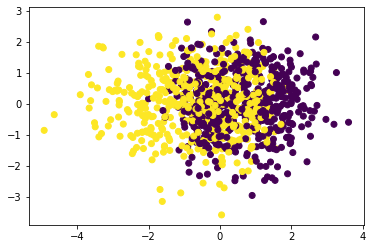

In [15]:
x, y = make_classification(n_samples=1000, n_classes=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

Como puedes ver, en esta ocasión los puntos se encuentran sumamente revueltos. Ahora los clasificadores pueden tener dificultades para separarlos!

Lo siguiente será utilizar el código de la sesión 02 para evaluar.

In [16]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc.round(2))+"%")
    print("Sensibilidad:"+str(sen.round(2))+"%")
    print("Especificidad:"+str(spec.round(2))+"%")

### Redes Neuronales Artificiales

Construye una red neuronal con 10 neurones en la primera capa y 4 neurones en la segunda capa. Utiliza la función de activación logística y un total de 20,000 iteraciones. Entrena el modelo y genera las predecciones con el conjunto de prueba para evaluar su desempeño


In [26]:
from sklearn.neural_network import MLPClassifier

NeuralNetwork = MLPClassifier(hidden_layer_sizes= (10,4),
                            max_iter=20000,
                            activation = "logistic",
                            tol= 1e-8)

NeuralNetwork.fit(x_train, y_train)
y_pred_nn = NeuralNetwork.predict(x_test)
print("¡Entrenamiento completado")

¡Entrenamiento completado


In [27]:
evaluar(y_test, y_pred_nn)

[[165  27]
 [ 21 187]]
True positives: 187
True negatives: 165
False positives: 27
False negative: 21
Precision:88.0%
Sensibilidad:89.9%
Especificidad:85.94%


### Random Forest
Construye un bosque aleatorio con 800 árboles de decisión. Entrena el modelo y genera las predecciones con el conjunto de prueba para evaluar su desempeño

In [24]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(n_estimators=800)

RandomForest.fit(x_train, y_train)
y_pred_rfc = RandomForest.predict(x_test)
print("¡Entrenamiento completado")

¡Entrenamiento completado


In [25]:
evaluar(y_test, y_pred_rfc)

[[184   8]
 [ 14 194]]
True positives: 194
True negatives: 184
False positives: 8
False negative: 14
Precision:94.5%
Sensibilidad:93.27%
Especificidad:95.83%


¿Cuál de los dos modelos de clasificación tuvo un mejor desempeño?

## Ejemplo 01: Support Vector Machine
En este ejemplo implementaremos una Máquina de Soporte Vectorial. No nos vamos a meter demasiado en como funciona por dentro, ya vimos que es una batalla que realmente nos va a desgastar mentalmente: En cambio, aplicaremos la máquina de soporte vectorial a un problema práctico.

Primero, importamos las librerías de siempre, y generaremos Blobs para probar.

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

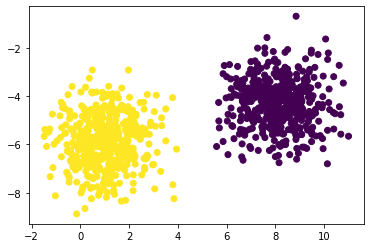

In [29]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

Luego, importaremos de la librería de SVM, el classificador de soporte vectorial. En la literatura, las máquinas de soporte vectorial se escriben como SVM (Support Vector Machines)

In [30]:
from sklearn.svm import SVC #Support Vector Classifier
#from sklearn.svm import SVR → Clasificador

Creamos el clasificador, y le sometemos los datos que tenemos. Recuerda que hay que pedirle que entrene y luego que genere una predicción, al igual que todos los clasificadores

In [31]:
SupportVectorMachine = SVC()
SupportVectorMachine.fit(x_train, y_train) 
y_pred = SupportVectorMachine.predict(x_test) 

Finalmente, utilizando el código de la Sesión 02, evaluaremos que tan bueno es el clasificador.

In [32]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[200   0]
 [  0 200]]
True positives: 200
True negatives: 200
False positives: 0
False negative: 0
Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%


## Reto 02: Neuronal Networks vs Decision Trees vs Support Vector Machines
En este reto vamos a comparar máquinas de soporte vectorial, árboles de decisión y redes neuronales artificiales. Veremos cual es mejor para solucionar un problema. Primero, importamos las librerías y utilizaremos nuevamente "make_classification" para agregarle dificultad

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split

Generamos nuestro dataset...

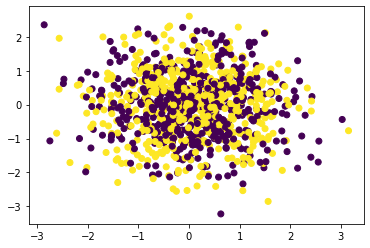

In [46]:
x, y = make_classification(n_samples=1000, n_classes=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

Y generamos nuestras funciones para evaluar

In [35]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

### Suppor Vector Machine

Construye una máquina de soporte vectorial. Entrena el modelo y genera las predecciones con el conjunto de prueba para evaluar su desempeño

In [37]:
from sklearn.svm import SVC #Support Vector Classifier

svc_m = SVC()
svc_m.fit(x_train,y_train)
y_pred_svc_m = svc_m.predict(x_test)
evaluar(y_test, y_pred_svc_m)

## Artificial Neuronal Network

Construye una red neuronal con 10 neurones en la primera capa y 4 neurones en la segunda capa. Utiliza la función de activación logística y un total de 20,000 iteraciones. Entrena el modelo y genera las predecciones con el conjunto de prueba para evaluar su desempeño

In [41]:
from sklearn.neural_network import MLPClassifier

nn_m = MLPClassifier(hidden_layer_sizes=(10,4),
                     max_iter=100000,
                     activation="logistic",
                     tol=1e-8)

nn_m.fit(x_train,y_train)
y_pred_nn_m = nn_m.predict(x_test)
evaluar(y_test, y_pred_nn_m)

## Random Forest
Construye un bosque aleatorio con 800 árboles de decisión. Entrena el modelo y genera las predecciones con el conjunto de prueba para evaluar su desempeño

In [43]:
from sklearn.ensemble import RandomForestClassifier

for_m = RandomForestClassifier(n_estimators=800)
for_m.fit(x_train,y_train)
y_pred_for_m = for_m.predict(x_test)
evaluar(y_test, y_pred_for_m)

## Ejemplo 2: Naive Bayes Classificator
En este ejemplo implementaremos un clasificador de Bayes ingenuo. Si tienes curiosidad, el clasificador de Bayes se basa en probabilidades y es bastante simplón de entender. Primero, importamos las librerías de siempre, y generaremos Blobs para probar.

In [48]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

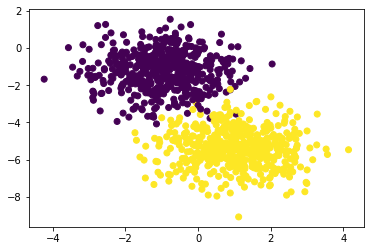

In [49]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

Luego, importaremos de la librería de Naïve Bayes. Se llama Gaussian NB debido a que utiliza funciones gaussianas para calcular las probabilidades. explicar esto sale un poco del scope de la clase, pero solo tienes que tener en mente que utiliza campanas de Gauss para estimar probabilidades.

In [50]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train) 
y_pred = NaiveBayes.predict(x_test) 

Finalmente, utilizando el código de la Sesión 02, evaluaremos que tan bueno es el clasificador.

In [51]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[202   0]
 [  0 198]]
True positives: 198
True negatives: 202
False positives: 0
False negative: 0
Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%


## Reto 3: ¡Lucha de clasificadores!
En este reto vamos a comparar todos los clasificadores entre si, para ver que tal funcionan. Podemos generar comparativas entre si y ver que tal funcionan.

In [52]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split

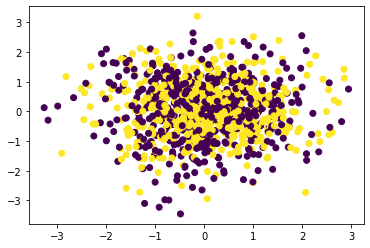

In [53]:
x, y = make_classification(n_samples=1000, n_classes=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [54]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

¡Que comience el reto!

### Naive Bayes

Construye un clasificador ingenuo de Bayes. Entrena el modelo y genera las predecciones con el conjunto de prueba para evaluar su desempeño

In [55]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train) 
y_pred_nb = NaiveBayes.predict(x_test) 

evaluar(y_test, y_pred_nb)

[[193   5]
 [ 38 164]]
True positives: 164
True negatives: 193
False positives: 5
False negative: 38
Precision:89.25%
Sensibilidad:81.1881188118812%
Especificidad:97.47474747474747%


### Support Vector Machine

Construye una máquina de soporte vectorial. Entrena el modelo y genera las predecciones con el conjunto de prueba para evaluar su desempeño

In [56]:
from sklearn.svm import SVC #Support Vector Classifier

svc_m = SVC()
svc_m.fit(x_train,y_train)
y_pred_svc_m = svc_m.predict(x_test)
evaluar(y_test, y_pred_svc_m)

[[189   9]
 [ 36 166]]
True positives: 166
True negatives: 189
False positives: 9
False negative: 36
Precision:88.75%
Sensibilidad:82.17821782178217%
Especificidad:95.45454545454545%


### Artificial Neuronal Network

Construye una red neuronal con 10 neurones en la primera capa y 4 neurones en la segunda capa. Utiliza la función de activación logística y un total de 20,000 iteraciones. Entrena el modelo y genera las predecciones con el conjunto de prueba para evaluar su desempeño

In [57]:
from sklearn.neural_network import MLPClassifier

nn_m = MLPClassifier(hidden_layer_sizes=(10,4),
                     max_iter=100000,
                     activation="logistic",
                     tol=1e-8)

nn_m.fit(x_train,y_train)
y_pred_nn_m = nn_m.predict(x_test)
evaluar(y_test, y_pred_nn_m)

[[183  15]
 [ 31 171]]
True positives: 171
True negatives: 183
False positives: 15
False negative: 31
Precision:88.5%
Sensibilidad:84.65346534653465%
Especificidad:92.42424242424242%


### Random Forest

Construye un bosque aleatorio con 800 árboles de decisión. Entrena el modelo y genera las predecciones con el conjunto de prueba para evaluar su desempeño

In [58]:
from sklearn.ensemble import RandomForestClassifier

for_m = RandomForestClassifier(n_estimators=800)
for_m.fit(x_train,y_train)
y_pred_for_m = for_m.predict(x_test)
evaluar(y_test, y_pred_for_m)

[[189   9]
 [ 26 176]]
True positives: 176
True negatives: 189
False positives: 9
False negative: 26
Precision:91.25%
Sensibilidad:87.12871287128714%
Especificidad:95.45454545454545%


## POSTWORK
Construir varios algoritmos de clasificación basados en Machine Learning, y mostrar cuál es
el mejor con base en evidencia sólida. Te invito a revisar la documentación de Sckit Learn para que revises los hiperparámetros y construyas distintos modelos

#### Cancer Dataset

In [59]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
x, y = dataset.data, dataset.target

### Preprocesamiento

In [60]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.30)

### Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train) 
y_pred_nb = NaiveBayes.predict(x_test) 

evaluar(y_test, y_pred_nb)

[[135  14]
 [ 15 234]]
True positives: 234
True negatives: 135
False positives: 14
False negative: 15
Precision:92.71356783919597%
Sensibilidad:93.97590361445783%
Especificidad:90.60402684563759%


### Support Vector Machine

In [62]:
from sklearn.svm import SVC #Support Vector Classifier

svc_m = SVC()
svc_m.fit(x_train,y_train)
y_pred_svc_m = svc_m.predict(x_test)
evaluar(y_test, y_pred_svc_m)

[[115  34]
 [  5 244]]
True positives: 244
True negatives: 115
False positives: 34
False negative: 5
Precision:90.20100502512562%
Sensibilidad:97.99196787148594%
Especificidad:77.18120805369128%


### Artificial Neuronal Network

In [63]:
from sklearn.neural_network import MLPClassifier

nn_m = MLPClassifier(hidden_layer_sizes=(10,4),
                     max_iter=100000,
                     activation="logistic",
                     tol=1e-8)

nn_m.fit(x_train,y_train)
y_pred_nn_m = nn_m.predict(x_test)
evaluar(y_test, y_pred_nn_m)

[[145   4]
 [ 21 228]]
True positives: 228
True negatives: 145
False positives: 4
False negative: 21
Precision:93.71859296482413%
Sensibilidad:91.56626506024097%
Especificidad:97.31543624161074%


### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

for_m = RandomForestClassifier(n_estimators=800)
for_m.fit(x_train,y_train)
y_pred_for_m = for_m.predict(x_test)
evaluar(y_test, y_pred_for_m)

[[144   5]
 [  9 240]]
True positives: 240
True negatives: 144
False positives: 5
False negative: 9
Precision:96.4824120603015%
Sensibilidad:96.3855421686747%
Especificidad:96.64429530201343%
